# Pembahasan Case Study

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv('./airbnb.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Analisa Data airbnb.csv

In [4]:
print('Total Column :', data.shape[1])
print('Total Row :', data.shape[0])

Total Column : 16
Total Row : 48895


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Membuat data statistik dari nilai numerik

In [6]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
# Mengubah format last review
data['last_review'] = pd.to_datetime(data['last_review'], format='%Y-%m-%d')

# Menampilkan data dengan filter
last_review = data.loc[data['last_review'] > '2019-07-01']

# Menampilkan 5 data last review teratas berdasarkan filter
last_review.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
13,6021,Wonderful Guest Bedroom in Manhattan for SINGLES,11528,Claudio,Manhattan,Upper West Side,40.79826,-73.96113,Private room,85,2,113,2019-07-05,0.91,1,333
23,8110,CBG Helps Haiti Rm #2,22486,Lisel,Brooklyn,Park Slope,40.68001,-73.97865,Private room,110,2,71,2019-07-02,0.61,6,304
39,12048,LowerEastSide apt share shortterm 1,7549,Ben,Manhattan,Lower East Side,40.71401,-73.98917,Shared room,40,1,214,2019-07-05,1.81,4,188
51,14287,Cozy 1BD on Central Park West in New York City,56094,Joya,Manhattan,Upper West Side,40.78635,-73.97008,Entire home/apt,151,2,73,2019-07-07,0.63,1,302


In [8]:
# Melihat total review
print('Total Review :', len(last_review))

Total Review : 3366


#### Check Null Values

In [9]:
data_null = data.isnull().sum()
data_null

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### Drop Column Null

In [10]:
data = data.drop(['id', 'name', 'host_id', 'host_name'], axis=1)
data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#### Fill Missing Value in last_review

In [11]:
data['last_review'] = data['last_review'].fillna(data['last_review'].mode()[0])

# Pastikan masih ada nilai Null atau tidak
data[['last_review']].isnull().sum()

last_review    0
dtype: int64

#### Fill Missing Value in review_per_month

In [12]:
data['reviews_per_month'] = data['reviews_per_month'].fillna(data['reviews_per_month'].mean())

# Pastikan masih ada nilai Null atau tidak
data[['reviews_per_month']].isnull().sum()

reviews_per_month    0
dtype: int64

#### Check Column Price

In [13]:
data.sort_values(by=['price'], ascending=False)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
29238,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,2019-06-23,1.373221,1,83
9151,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.040000,1,0
17692,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.160000,1,0
6530,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,2015-01-02,0.020000,1,0
40433,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,2019-06-23,1.373221,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...
26866,Brooklyn,Bushwick,40.69166,-73.90928,Shared room,0,30,5,2019-05-24,0.260000,6,139
25796,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.350000,6,222
26259,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,2019-06-23,1.373221,1,0
25433,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.560000,4,127


#### Check harga minimal dan harga maksimal

In [14]:
price = data['price']
print(f'Minimum Price is : {price.min()} \nMaksimum price is : {price.max()}')

Minimum Price is : 0 
Maksimum price is : 10000


#### Melihat nilai mean, median dan sum dengan grouping

In [15]:
data.groupby('neighbourhood')['price'].agg(['mean', 'median', 'sum'])


,mean,median,sum
neighbourhood,,,
Allerton,87.595238,66.5,3679
Arden Heights,67.250000,72.5,269
Arrochar,115.000000,65.0,2415
Arverne,171.779221,125.0,13227
Astoria,117.187778,85.0,105469
...,...,...,...
Windsor Terrace,138.993631,123.0,21822
Woodhaven,67.170455,52.0,5911
Woodlawn,60.090909,68.0,661


#### Create Column Price Category

In [16]:
data['price_category'] = np.where(data['price'] < 50, 'Cheap', np.where(data['price'] < 100, 'Medium', 'Expensive'))

data['price_category'].unique()

array(['Expensive', 'Medium', 'Cheap'], dtype=object)

In [17]:
data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365,Expensive
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355,Expensive
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,1.373221,1,365,Expensive
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194,Medium
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0,Medium


# Visualize

In [18]:
df_Brooklyn = data[['neighbourhood_group', 'neighbourhood']].loc[data['neighbourhood_group'] == 'Brooklyn']
df_Brooklyn.head()

,neighbourhood_group,neighbourhood
0,Brooklyn,Kensington
3,Brooklyn,Clinton Hill
6,Brooklyn,Bedford-Stuyvesant
12,Brooklyn,South Slope
15,Brooklyn,Williamsburg


In [19]:
neighbourhood = []
total = []

neighbourhood_dict = df_Brooklyn.value_counts().to_dict()

for key in neighbourhood_dict :
    neighbourhood.append(key[1]), total.append(neighbourhood_dict[key])
    
print('Total neighbourhood :', len(neighbourhood))

Total neighbourhood : 47


<>:10: SyntaxWarning: "is not" with 'int' literal. Did you mean "!="?
<>:10: SyntaxWarning: "is not" with 'int' literal. Did you mean "!="?
C:\Users\Suwaaan\AppData\Local\Temp\ipykernel_21572\114883028.py:10: SyntaxWarning: "is not" with 'int' literal. Did you mean "!="?
  if i is not 30:


<Figure size 1500x500 with 0 Axes>

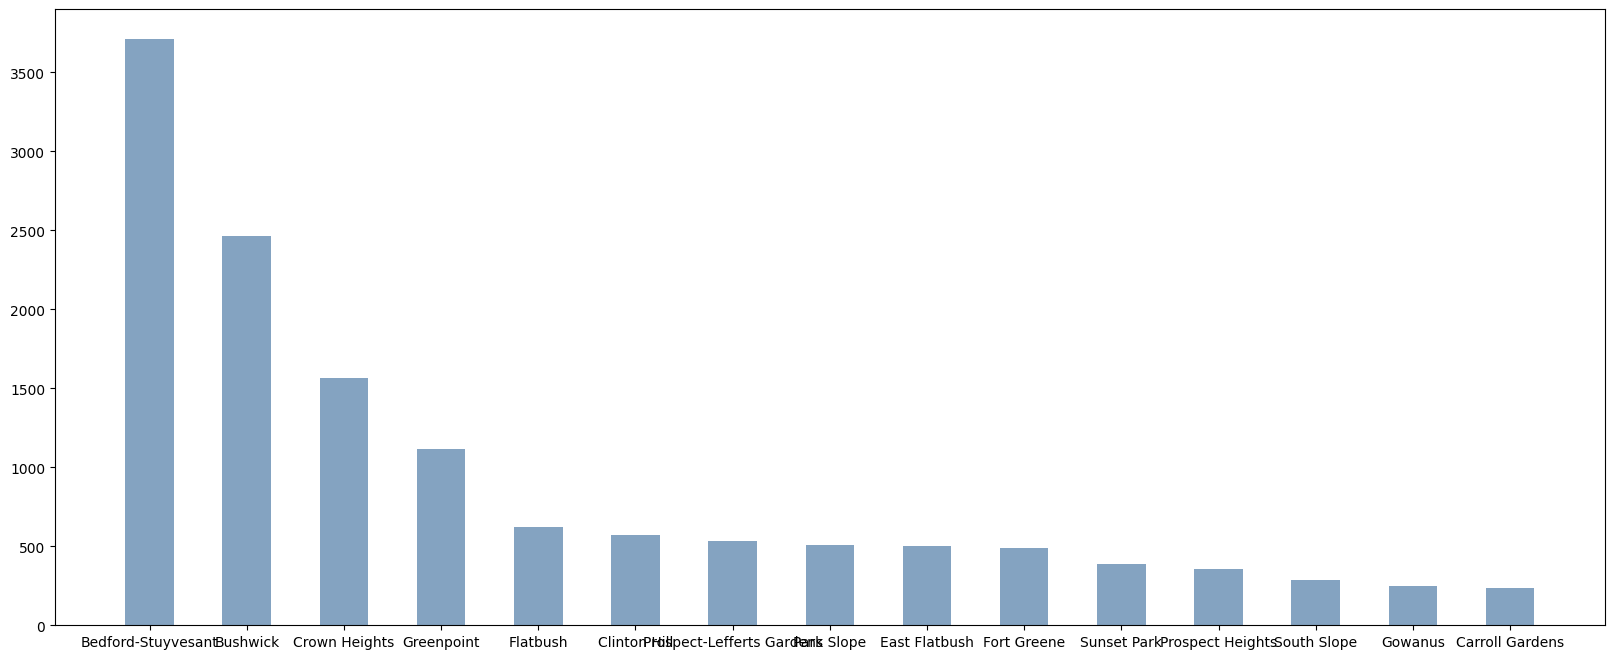

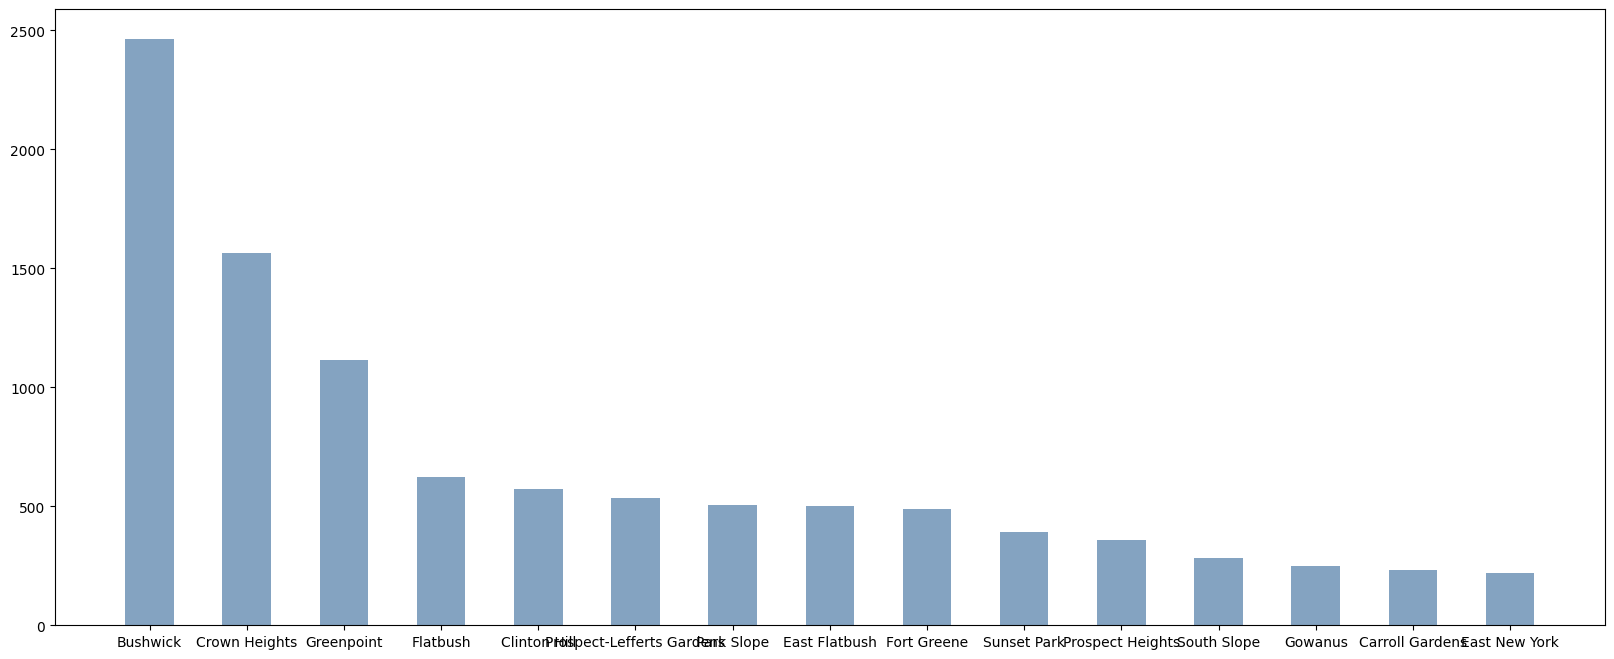

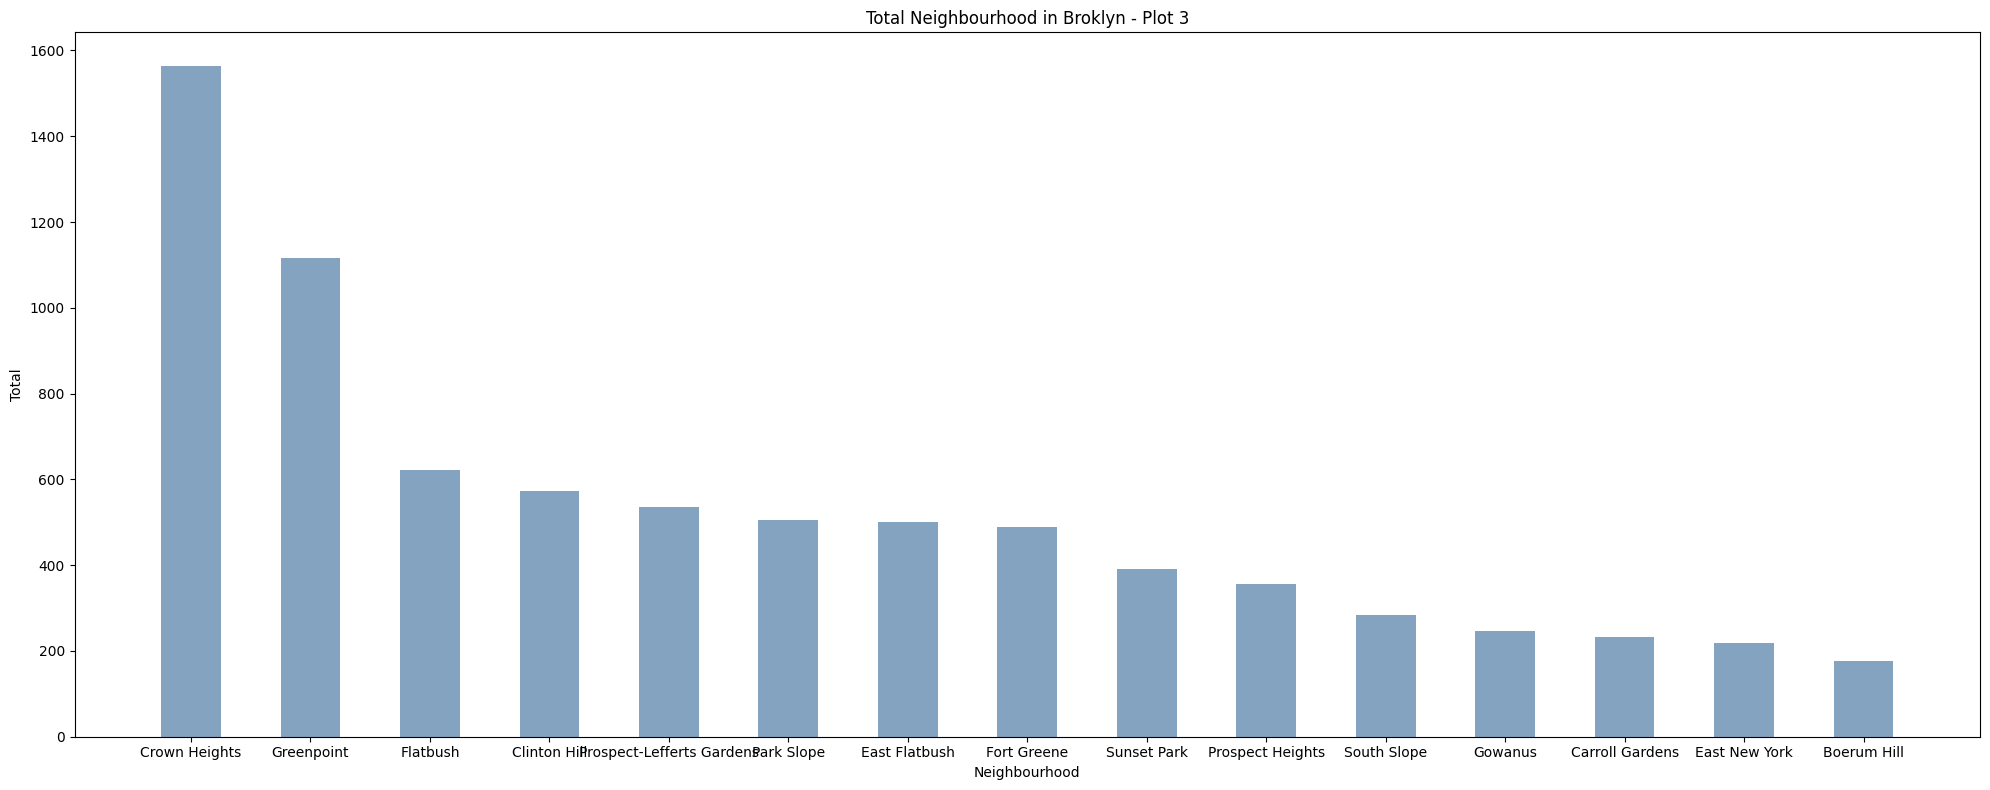

In [20]:
# from matplotlib import rc

plt.figure(figsize=(15, 5))
# rc('font', **{'size': 6})

num_in_plot = 15

for i in range(1, (len(neighbourhood)//num_in_plot)+1):
    plt.figure(figsize=(20, 8))
    if i is not 30:
        plt.bar(neighbourhood[i:i+num_in_plot], total[i:i+num_in_plot], color=(0.2, 0.4, 0.6, 0.6), width=0.5)
    else:
        plt.bar(neighbourhood[i:], color=(0.2, 0.4, 0.6, 0.6))

plt.title(f'Total Neighbourhood in Broklyn - Plot {i}')
plt.xlabel('Neighbourhood')
plt.ylabel('Total')
plt.tight_layout()

plt.show()

#### Scatter Chart untuk apakah semakin mahal service makin sedikit review

Maximum review :  629


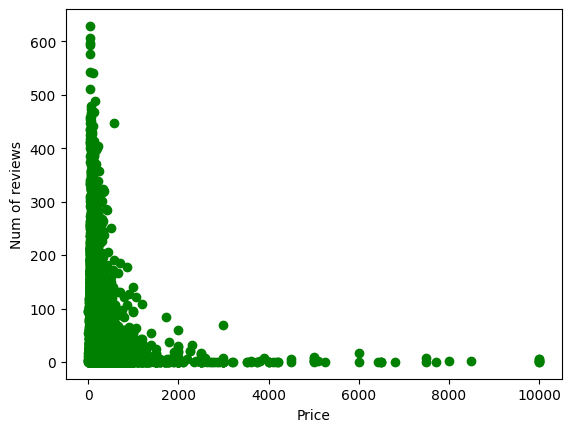

In [21]:
print('Maximum review : ', data['number_of_reviews'].max())

plt.scatter(data['price'], data['number_of_reviews'], color='green')
plt.xlabel('Price')
plt.ylabel('Num of reviews')

plt.show()

#### Melihat ketersediaan dari berbagai service

In [22]:
data['is_availability'] = np.where(data['availability_365'] == 0, 'No', 'Yes')
data['is_availability'].value_counts()

is_availability
Yes    31362
No     17533
Name: count, dtype: int64

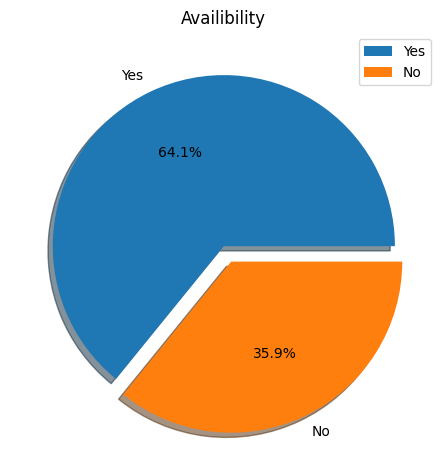

In [23]:
plt.pie(data['is_availability']. value_counts().tolist(), labels=['Yes', 'No'], autopct='%1.1f%%', shadow=True, explode=(0, 0.1))
plt.title('Availibility')
plt.tight_layout()
plt.legend()


plt.show()

#### Melihat jumlah kamar

In [24]:
data['room_type'].value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

#### Visualize Price

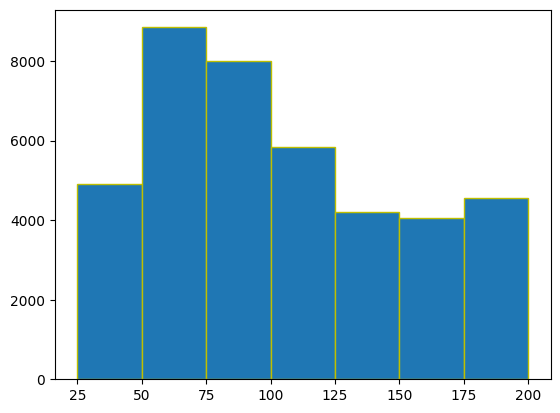

In [25]:
price = data['price']
bins = [25, 50, 75, 100, 125, 150, 175, 200]

plt.hist(price, bins = bins, edgecolor='y')

plt.show()

In [26]:
price_category = data['price_category'].value_counts()
price_category = pd.DataFrame(price_category)
price_category.reset_index(inplace=True)
price_category

,price_category,count
0,Expensive,27018
1,Medium,16850
2,Cheap,5027


In [27]:
price_category.columns = ['category', 'total']
category = price_category['category']
total = price_category['total']

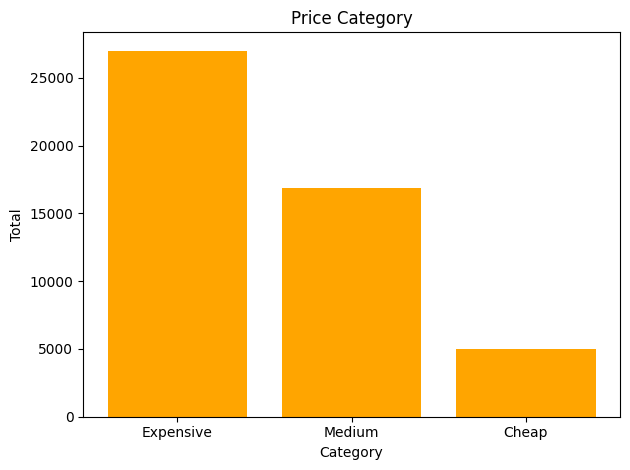

In [28]:
plt.bar(category, total, color='orange')

plt.title('Price Category')
plt.xlabel('Category')
plt.ylabel('Total')

plt.tight_layout()
plt.show()

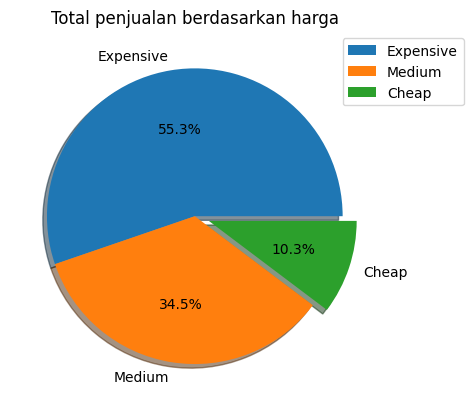

In [29]:
plt.pie(total, labels= list(price_category['category']), autopct='%1.1f%%', explode=(0, 0, 0.1), shadow=True)

plt.title('Total penjualan berdasarkan harga')
plt.legend(loc=(0.9, 0.8))

plt.show()

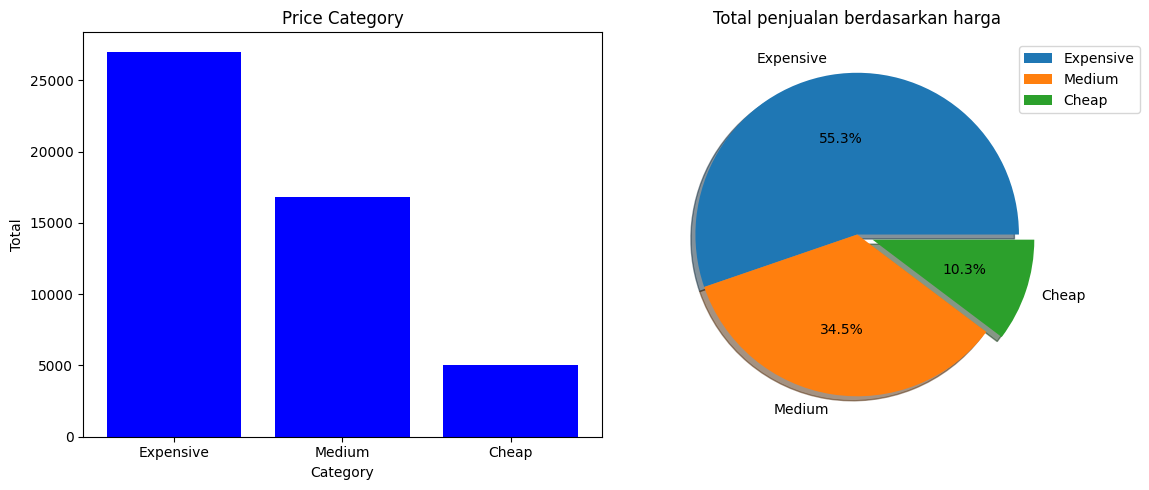

In [30]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.bar(category, total, color='b')
plt.title('Price Category')
plt.xlabel('Category')
plt.ylabel('Total')


plt.subplot(122)
plt.pie(total, labels= list(price_category['category']), autopct='%1.1f%%', explode=(0, 0, 0.1), shadow=True)
plt.title('Total penjualan berdasarkan harga')
plt.legend(loc=(0.9, 0.8))

plt.tight_layout()
plt.show()

#### Melihat Mean, Median, Sum

In [31]:
neighbourhood_group = data['neighbourhood_group']
price = data['price']

In [33]:
df_ = data.groupby('neighbourhood_group')['price'].agg(['mean', 'median', 'sum'])
df_ = df_.sort_values('sum', ascending=False)
df_

,mean,median,sum
neighbourhood_group,,,
Manhattan,196.875814,150.0,4264527
Brooklyn,124.383207,90.0,2500600
Queens,99.517649,75.0,563867
Bronx,87.496792,65.0,95459
Staten Island,114.812332,75.0,42825


#### Perbandingan harga untuk tiap neighbourhood

In [34]:
neighbourhood_group = df_.index.tolist()
price = df_['sum'].tolist()

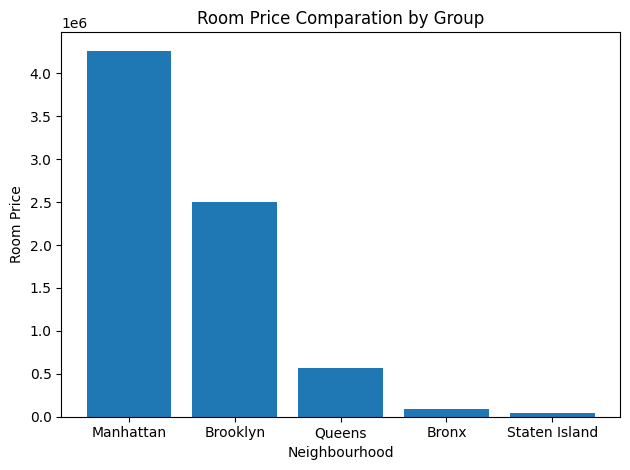

In [40]:
plt.bar(neighbourhood_group, price)

plt.title('Room Price Comparation by Group')
plt.xlabel('Neighbourhood')
plt.ylabel('Room Price')
plt.tight_layout()

plt.show()